In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

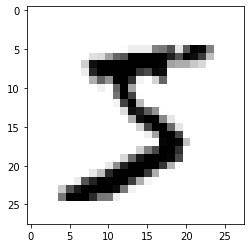

In [13]:
plt.imshow(train_images[0],cmap='gray_r')

In [14]:
train_labels[0]

5

In [15]:
train_images.shape[0]

60000

In [16]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
#casting
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# Normalizing
train_images /= 255
test_images /= 255

In [17]:
train_images.shape

(60000, 28, 28, 1)

In [18]:
train_images[0].shape

(28, 28, 1)

In [19]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
#kernel- 16,32,64,128,256,512

In [20]:
# CNN
model = models.Sequential()
model.add(layers.Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(56,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(56,(3,3),activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
Total params: 42,728
Trainable params: 42,728
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary() #56x3x3=505=4 - flatten

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten (Flatten)            (None, 504)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [27]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [28]:
history = model.fit(train_images,train_labels,epochs=5,batch_size=10,validation_split=0.2)


Epoch 1/5


C:\Users\Admin\.conda\envs\deepl1\lib\site-packages\keras\backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


4800/4800 [==============================] - 70s 13ms/step - loss: 0.1318 - accuracy: 0.9591 - val_loss: 0.0544 - val_accuracy: 0.9830
Epoch 2/5
4800/4800 [==============================] - 69s 14ms/step - loss: 0.0480 - accuracy: 0.9854 - val_loss: 0.0466 - val_accuracy: 0.9859
Epoch 3/5
4800/4800 [==============================] - 65s 14ms/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0382 - val_accuracy: 0.9888
Epoch 4/5
4800/4800 [==============================] - 67s 14ms/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0458 - val_accuracy: 0.9870
Epoch 5/5
4800/4800 [==============================] - 73s 15ms/step - loss: 0.0220 - accuracy: 0.9927 - val_loss: 0.0505 - val_accuracy: 0.9862


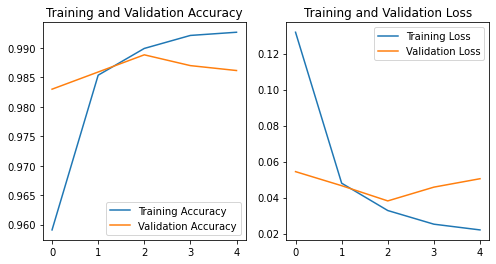

In [29]:
epochs = 5
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
test_images[23].shape


(28, 28, 1)

In [31]:
test_labels[23]

5

In [32]:
model.predict(test_images[23].reshape(1,28,28,1))

array([[2.3702997e-12, 3.4188055e-10, 2.9715973e-13, 1.7079069e-09,
        1.1843628e-12, 9.9999869e-01, 1.3245794e-06, 1.8085704e-13,
        5.6470340e-09, 1.9622654e-11]], dtype=float32)

In [33]:
model.predict(test_images[23].reshape(1,28,28,1)).round(2)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [34]:
np.argmax(model.predict(test_images[23].reshape(1,28,28,1)),axis=1)

array([5], dtype=int64)

In [35]:
np.argmax(model.predict(test_images[23].reshape(1,28,28,1)),axis=1)[0]

5